<a href="https://colab.research.google.com/github/dlrhksghdaf/DS_30/blob/main/3_Pytorch_Logistic_Regression_(%EC%88%98%EC%97%85%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## 1. Binary Classification

|score($x$)|result($y$)|
|-----|---|
|45|Fail|
|50|Fail|
|55|Fail|
|60|Pass|
|65|Pass|
|70|Pass|

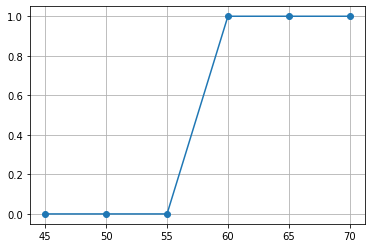

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
x = [45, 50, 55, 60, 65, 70]
y = [0, 0, 0, 1, 1, 1]

plt.plot(x, y, marker='o')
plt.grid()
plt.show()

이러한 관계를 모델링 하기 위해서 Linear Regression에서 사용 했던 $H(\mathbf{x}) = \mathbf{w}\cdot\mathbf{x} + b$에 sigmoid 함수 $\sigma(\cdot)$을 적용해서 새로운 $H$를 정의 한다.

따라서 새로운 $H(\mathbf{x})$는 다음과 같다.
$$H(\mathbf{x})=\sigma(\mathbf{w}\cdot\mathbf{x}+ b)$$

Sigmoid 함수는 다음과 같다.
$$\sigma(x) = \frac{1}{1+ e^{-x}}=\frac{e^x}{e^x+1}$$

## 2. Sigmoid Function

In [ ]:
# plt.axhline(y=0.5, color='red', linewidth=1.5)
import numpy as np
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

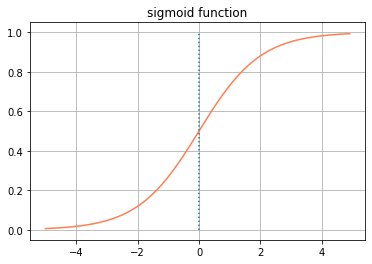

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, 'coral')
plt.plot([0, 0], [0, 1.0], ':')
plt.title('sigmoid function')
plt.grid()
plt.show()

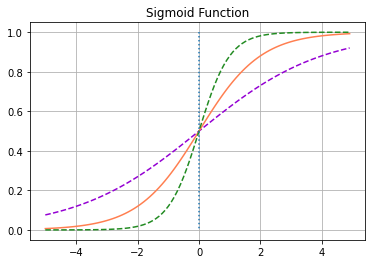

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'darkviolet', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'coral') # W의 값이 1일때
plt.plot(x, y3, 'forestgreen', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.grid()
plt.show()

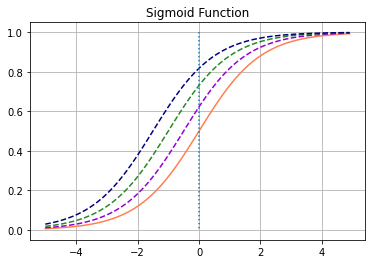

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y0 = sigmoid(x)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y0, 'coral') # x
plt.plot(x, y1, 'darkviolet', linestyle='--') # x + 0.5
plt.plot(x, y2, 'forestgreen', linestyle='--') # x + 1
plt.plot(x, y3, 'navy', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.grid()
plt.show()

## 3. Cost function

Binary Classification을 위해서는 $y=1$인 경우에 예측 값 $H(\mathbf{x})$ (class가 1일 확률) 이 0에 가까우면 오차가 커야 하고 $y=0$인 경우에 예측값 $H(\mathbf{x})$ (class가 1일 확률)이 1에 가까우면 오차가 커야 한다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


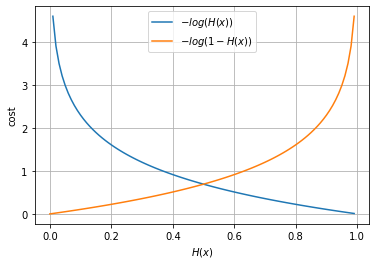

In [ ]:
x = np.arange(0, 1, 0.01)
plt.plot(x, -np.log(x), label='$-log(H(x))$')
plt.plot(x, -np.log(1-x), label='$-log(1-H(x))$')
plt.xlabel('$H(x)$')
plt.ylabel('cost')
plt.legend()
plt.grid()

$$\mathcal{L}(H(x), y)=-[y\log H(x) + (1-y)\log(1-H(x)]$$
$$\mathcal{L}(W)=-\frac{1}{N}\sum_{i=1}^{n}[y^{i}\log H(x^i)+(1-y^i)\log (1-H(x^i))]$$

## 4. Logistic Regression with Pytorch

### 4.1. 기본 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [ ]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [ ]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [ ]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

NameError: ignored

In [ ]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [ ]:
# pytorch library에서 제공하는 loss
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

전체 코드

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


### 4.2. nn.Module로 구현하기

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

[연습]
- data: input_dim=2, output_dim=1

In [ ]:
model = nn.Sequential(nn.Linear(2, 1)
   , # input_dim = 2, output_dim = 1
    nn.Sigmoid()# 출력은 시그모이드 함수를 거친다
)

In [ ]:
model(x_train)

tensor([[0.5092],
        [0.5124],
        [0.3457],
        [0.4034],
        [0.3516],
        [0.2562]], grad_fn=<SigmoidBackward>)

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.861517 Accuracy 16.67%
Epoch   10/1000 Cost: 0.390700 Accuracy 83.33%
Epoch   20/1000 Cost: 0.441480 Accuracy 83.33%
Epoch   30/1000 Cost: 0.361725 Accuracy 83.33%
Epoch   40/1000 Cost: 0.305925 Accuracy 83.33%
Epoch   50/1000 Cost: 0.256611 Accuracy 83.33%
Epoch   60/1000 Cost: 0.212059 Accuracy 100.00%
Epoch   70/1000 Cost: 0.175889 Accuracy 100.00%
Epoch   80/1000 Cost: 0.154055 Accuracy 100.00%
Epoch   90/1000 Cost: 0.141992 Accuracy 100.00%
Epoch  100/1000 Cost: 0.132479 Accuracy 100.00%
Epoch  110/1000 Cost: 0.124199 Accuracy 100.00%
Epoch  120/1000 Cost: 0.116911 Accuracy 100.00%
Epoch  130/1000 Cost: 0.110447 Accuracy 100.00%
Epoch  140/1000 Cost: 0.104675 Accuracy 100.00%
Epoch  150/1000 Cost: 0.099489 Accuracy 100.00%
Epoch  160/1000 Cost: 0.094804 Accuracy 100.00%
Epoch  170/1000 Cost: 0.090551 Accuracy 100.00%
Epoch  180/1000 Cost: 0.086672 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083120 Accuracy 100.00%
Epoch  200/1000 Cost: 0.079854 Accuracy 100.00

### 4.3. Class로 Logistic Regression 구현하기

In [ ]:
import torch

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
# Custom Dataset
class CustomDataset(torch.utils.data.Dataset): 
  def __init__(self):
    # 데이터 전처리
    self.x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
    self.y_data = [[0], [0], [0], [1], [1], [1]]

  def __len__(self):
    # 데이터셋의 길이, # of samples
    return len(self.x_data)

  def __getitem__(self, idx):
    # 특정 idx에 대한 return 값을 정의
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])
    return x, y

In [ ]:
from torch.utils.data import DataLoader # 데이터로더

dataset = CustomDataset()
data_loader = DataLoader(dataset, batch_size=2)

In [ ]:
import torch.nn as nn
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        # self.layers = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())

    def forward(self, x):
        x = self.linear(x)
        out = self.sigmoid(x)
        # out = self.layers(x)
        return out

In [ ]:
import torch.optim as optim
# Model object
model = BinaryClassifier().cuda()
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
# Training
for epoch in range(1000):
  for i, samples in enumerate(data_loader):
    x, y = samples
    x = x.cuda()
    y = y.cuda()
    pred = model(x)

    cost = F.binary_cross_entropy(pred, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  
  if epoch % 10 == 0:
    print("Epoch: {}\tCost value {}".format(epoch, cost.item()))




RuntimeError: ignored